In [1]:
# 1  Lab | Cleaning numerical data
# 2  Lab | Cleaning categorical data
# 3  Lab | Feature extraction
# 4  Lab | Comparing regression models
# 5  Lab | Random variable distributions

In [2]:
#main
import pandas as pd
import numpy as np
import math
import sklearn

#graphic
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

#specific
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [5]:
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [7]:
# Standardizing the column names
cols = [] 
for i in range(len(customer_df.columns)):
    cols.append(customer_df.columns[i].lower().replace(' ','_'))
customer_df.columns = cols

In [8]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [9]:
# date column to datetime format

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce') 
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

,number_of_customers
effective_to_date,
2011-01-01,148
2011-01-02,160
2011-01-03,178
2011-01-04,115
2011-01-05,167


<AxesSubplot:xlabel='effective_to_date', ylabel='number_of_customers'>

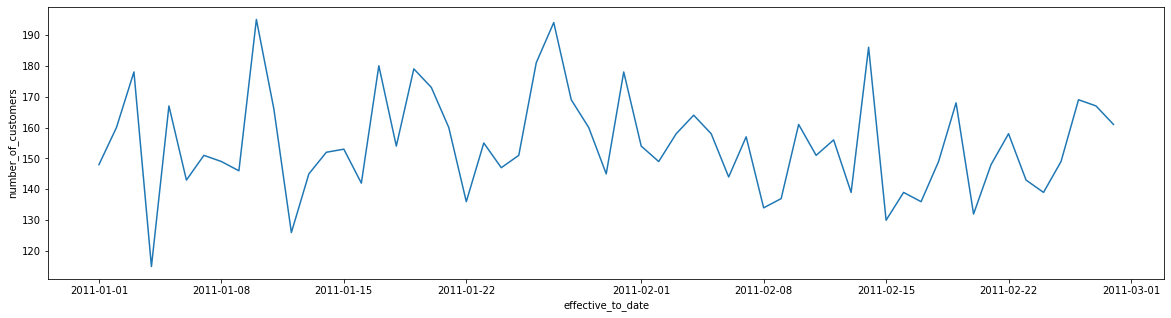

In [10]:
# ploting 'effective_to_date' vs 'total_number_of_customers'

time_df= customer_df[['effective_to_date', 'customer']]
time_df=time_df.groupby(['effective_to_date']).agg({'customer': pd.Series.nunique}).rename(columns={'customer':'number_of_customers'})

display (time_df.head())

plt.figure(figsize=(20,5))
sns.lineplot(data=time_df, x='effective_to_date', y='number_of_customers')


In [11]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [12]:
customer_df.isna().sum()/len(customer_df)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

# Numerical-Categorical

In [13]:
numerical_df=customer_df.select_dtypes(np.number)
categorical_df=customer_df.select_dtypes(object)

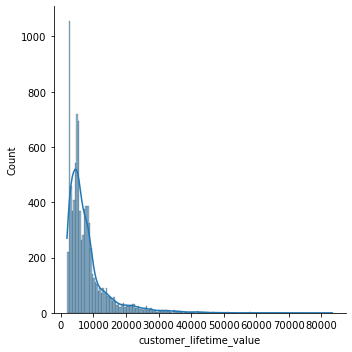

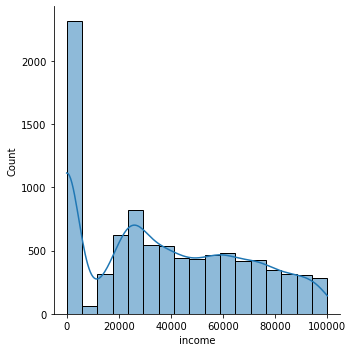

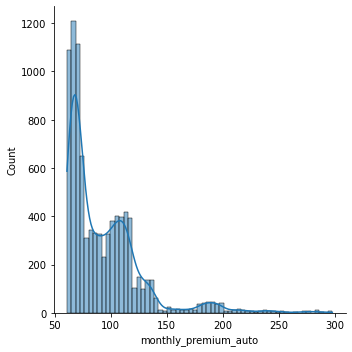

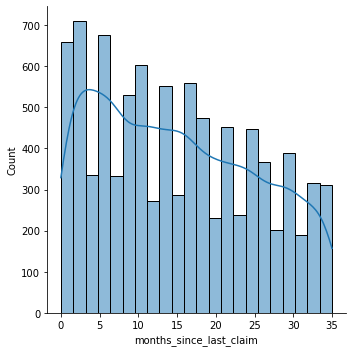

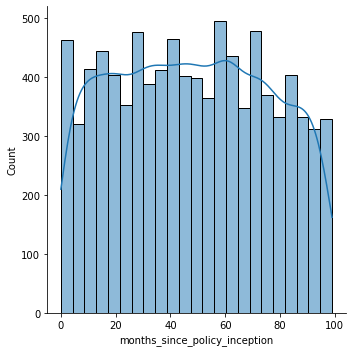

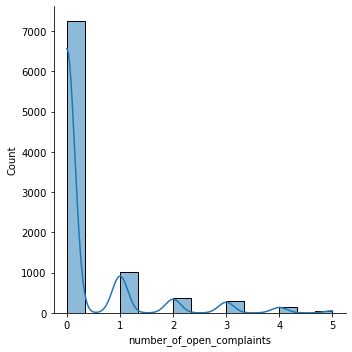

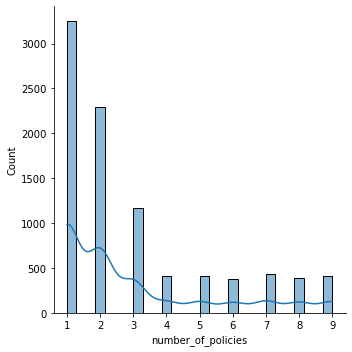

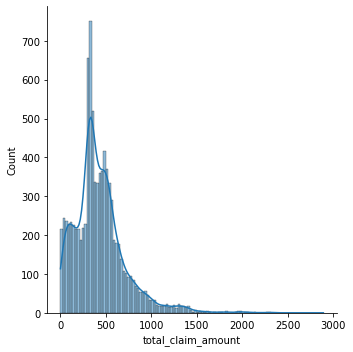

In [14]:
def plot_displot(df): #for continuous numerical columns
    for column in df.columns:
        sns.displot(df[column], kde=True)
        plt.show()
    return None

plot_displot(numerical_df)

# Outliers

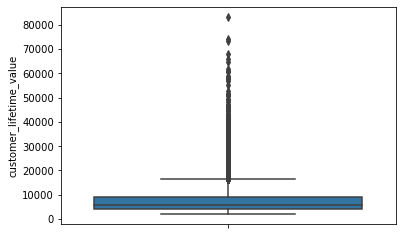

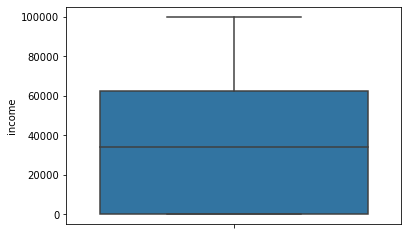

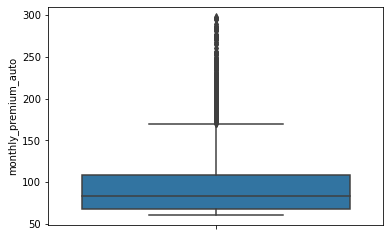

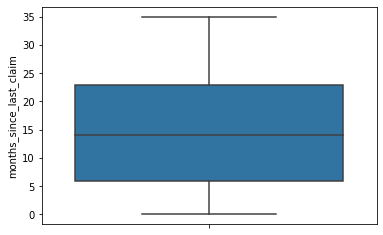

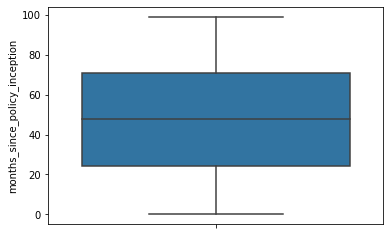

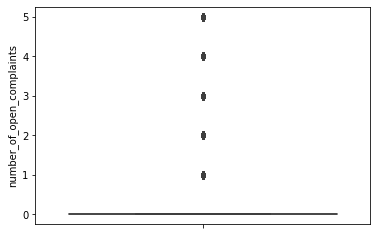

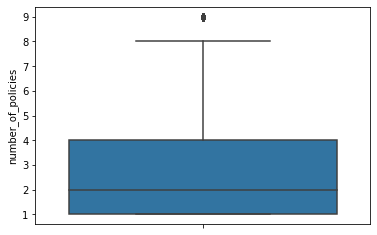

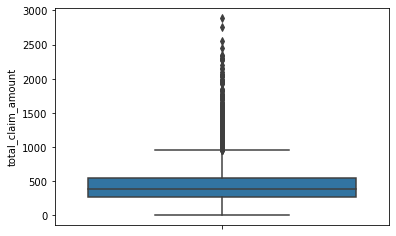

In [15]:
def plot_boxplot(df): # for categorical and discrete-numerical columns
    for column in df.columns:
        sns.boxplot(y=df[column])
        plt.show()
    return None

plot_boxplot(numerical_df)

In [16]:
# Checking how many values will be removed if the outliers are removed
def outliers(df,col):
    iqr = np.nanpercentile(df[col],75) - np.nanpercentile(df[col],25)
    upper_limit = np.nanpercentile(df[col],75) + 1.5*iqr # tentatively calling these outliers.
    extraordinary_points = df[df[col] >upper_limit]
    return upper_limit, len(extraordinary_points)


In [17]:
#customer_lifetime_value
upper_limit_cuslifevalue, total_outliers_cuslifevalue= outliers(customer_df,'customer_lifetime_value')
print(upper_limit_cuslifevalue) #looking at the boxblot above I would say that the upper limit is more like 70000
print(total_outliers_cuslifevalue)

16414.039911750002
817


In [18]:
extraordinary_points_cuslifevalue = customer_df[customer_df['customer_lifetime_value'] >70000]
len(extraordinary_points_cuslifevalue)

3

In [19]:
# income
upper_limit_income,  total_outliers_income= outliers(customer_df,'income')
print(upper_limit_income) # no outliers. And in my opinion, no row in income should be treated as a 'meaningless' outlier
print(total_outliers_income)

155800.0
0


In [20]:
#total_claim_amount
upper_limit_claimamount, total_outliers_claimamount= outliers(customer_df,'total_claim_amount')
print(upper_limit_claimamount) # similar to the income column, I do not think there are meaningless outliers.
                                        # there may be very rich people whose claims are very high
print(total_outliers_claimamount)

960.3997301249999
453


In [21]:
extraordinary_points_claimamount = customer_df[customer_df['total_claim_amount'] >2600] 
len(extraordinary_points_claimamount) #testing what looks like the apparent upper limit on the boxplot (2600)

2

In [22]:
#monthly_premium_auto

upper_limit_monthlypremauto, total_outliers_monthlypremauto= outliers(customer_df,'monthly_premium_auto')
print(upper_limit_monthlypremauto) #looking at the boxbplot, I do not see outliers. I would not remove anything

print(total_outliers_monthlypremauto)


170.5
430


    # Apparently there are outliers in these columns based on the interquartile range.
    # I am not sure whether these should be removed. These customers may actually be very rich people.
    # And they still represent the reality.
    # Even so, this does not change the fact that they are outliers and their data skew the overall data. 
    # Jan's idea is that analyzing these outliers separately might be very useful in the insurance sector.
    # In this lab, I will leave them in.


In [23]:
# Erin's way of checking the outliers and removing them (will not actually remove):

In [24]:
def outliers(column, threshold = 3):
    data = column[abs(column.apply(lambda x: (x - column.mean())/column.var()**(1/2))) > threshold]    
    return data

In [25]:
CLV_outliers = outliers(numerical_df["customer_lifetime_value"])
MPA_outliers = outliers(numerical_df["monthly_premium_auto"])

In [26]:
len(CLV_outliers)

211

In [27]:
len(MPA_outliers)

200

In [28]:
# to_drop = CLV_outliers.index | MPA_outliers.index # Union

In [29]:
# clean_numerical_df = numerical_df.drop(to_drop).reset_index(drop = True)
# clean_numerical_df.isna().sum()

In [30]:
# categorical_df = categorical_df.drop(to_drop).reset_index(drop = True)

In [31]:
# print("New shape: ",clean_numerical_df.shape)

In [32]:
numerical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [33]:
numerical_df.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [34]:
def valuecounts(df):    
    for c in df.columns:
        print ('Column:', c)
        print (df[c].value_counts(dropna=False))
        print ("")
    return


valuecounts(numerical_df)

Column: customer_lifetime_value
7200.664877     6
17497.522010    6
2248.449633     6
8092.876960     6
6057.072080     6
               ..
9162.063169     1
2374.147419     1
6874.848270     1
9934.865795     1
2611.836866     1
Name: customer_lifetime_value, Length: 8041, dtype: int64

Column: income
0        2317
95697      12
27972       7
25370       7
61108       7
         ... 
36529       1
25859       1
38179       1
70190       1
21941       1
Name: income, Length: 5694, dtype: int64

Column: monthly_premium_auto
65     348
66     307
71     304
73     302
63     289
      ... 
273      1
287      1
268      1
232      1
286      1
Name: monthly_premium_auto, Length: 202, dtype: int64

Column: months_since_last_claim
3     381
6     364
1     345
4     335
7     333
2     329
0     314
5     313
10    306
11    297
16    295
15    286
13    285
8     279
12    273
14    268
17    263
9     250
19    246
23    239
25    236
21    233
20    231
18    229
22    218
24    211
29 

In [35]:
# Alternative #
# def valuecounts1(df):
#     for col in df.columns:
#         print(col, ': ', len(df[col].value_counts()))
#     return

#valuecounts1(numerical)    

In [36]:
numerical_df.apply(pd.Series.unique)

customer_lifetime_value          [2763.519279, 6979.535903, 12887.43165, 7645.8...
income                           [56274, 0, 48767, 43836, 62902, 55350, 14072, ...
monthly_premium_auto             [69, 94, 108, 106, 73, 67, 101, 71, 93, 110, 7...
months_since_last_claim          [32, 13, 18, 12, 14, 0, 17, 23, 27, 9, 21, 11,...
months_since_policy_inception    [5, 42, 38, 65, 44, 94, 13, 68, 3, 7, 87, 82, ...
number_of_open_complaints                                       [0, 2, 1, 3, 5, 4]
number_of_policies                                     [1, 8, 2, 7, 9, 4, 3, 6, 5]
total_claim_amount               [384.811147, 1131.464935, 566.472247, 529.8813...
dtype: object

In [37]:
print('Old shape', numerical_df.shape)

Old shape (9134, 8)


# Discrete - Continuous

In [38]:
def discrete_continuous(df): # df = dataframe to pass function to
        
    continuous_lst = [] # set up empty lists
    discrete_lst = []
    
    # column becomes the next column name
    for column in df.columns:               
        if len(df[column].unique()) < (df.shape[0] * 0.02): # if the number of rows is less than cutoff it is discrete; more than cutoff, it is continuous
            discrete_lst.append(column) #append column name to continuous
        else:
            continuous_lst.append(column)
            
    cont_df= customer_df[continuous_lst]        
    disc_df= customer_df[discrete_lst]
    
    return disc_df, cont_df



In [39]:
num_discrete_df, num_continuous_df = discrete_continuous(numerical_df)

In [40]:
display(num_discrete_df.shape)
display(num_continuous_df.shape)

(9134, 4)

(9134, 4)

In [41]:
display(num_discrete_df.head())
display(num_continuous_df.head())

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1


,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879


# Correlations

In [42]:
corr_matrix=customer_df.corr() #this only shows numericals anyways
corr_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


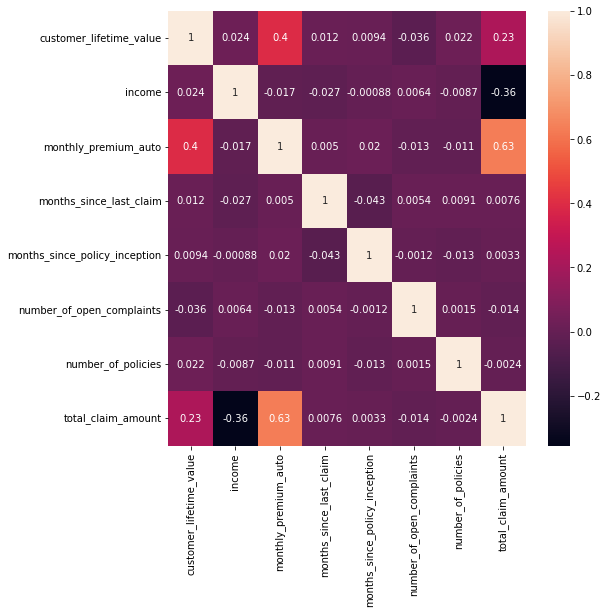

In [43]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

# Categorical

In [44]:
#Checking the categorical columns

categorical_columns = [col for col in categorical_df if (len(categorical_df[col].unique()) < (numerical_df.shape[0] *0.01))]


In [45]:
display(categorical_columns)

['state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [46]:
## Question: Does any column contain alpha and numeric data? Decide how to clean it. 

# ANSWER: customer, policy, and renew_offer_type have alpha and numeric characters.
# I will drop the 'customer' column as it does not serve for the purpose of modeling
# The others two are categorical and I will keep them but I will modify 'policy'.
# Data in all the other columns are made up of only alphabetical characters


In [47]:
# Dropping the personal-special-corporate info in the 'policy' column (as the same info is
    #available in the policy type column)
categorical_df.policy = categorical_df.policy.str.replace("\w* ",'')


/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_21329/800197377.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  categorical_df.policy = categorical_df.policy.str.replace("\w* ",'')


In [48]:
# Other data preparation activities

def clean(df): #combining several unique values in the following columns in a function
    df = df.drop(['customer'], axis=1)

    df['vehicle_class']= df['vehicle_class'].replace({'Four-Door Car':'Regular Car', 'Two-Door Car':'Regular Car',
                                                 'Luxury SUV':'Luxury', 'Luxury Car':'Luxury'})
    
    df['marital_status']= df['marital_status'].replace({'Divorced':'Single'})
    
    return df

categorical_df= clean(categorical_df)

In [49]:
#Cross checking categoricals in the dataset
categorical_df.head(10)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,L3,Offer1,Agent,Regular Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,L3,Offer3,Agent,Regular Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,L3,Offer1,Agent,Regular Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,L1,Offer1,Agent,Regular Car,Medsize
5,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,L3,Offer2,Web,Regular Car,Medsize
6,Oregon,Yes,Basic,College,Employed,F,Suburban,Married,Corporate Auto,L3,Offer1,Agent,Regular Car,Medsize
7,Arizona,No,Premium,Master,Unemployed,M,Urban,Single,Corporate Auto,L3,Offer1,Agent,Regular Car,Medsize
8,Oregon,Yes,Basic,Bachelor,Medical Leave,M,Suburban,Single,Corporate Auto,L3,Offer1,Agent,Regular Car,Medsize
9,Oregon,No,Extended,College,Employed,F,Urban,Married,Special Auto,L2,Offer2,Branch,Regular Car,Medsize


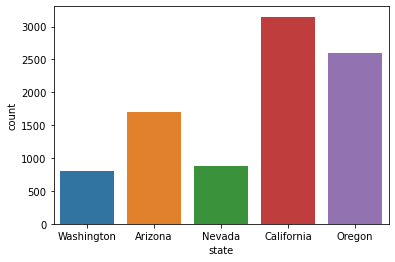

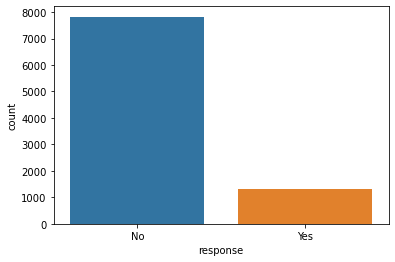

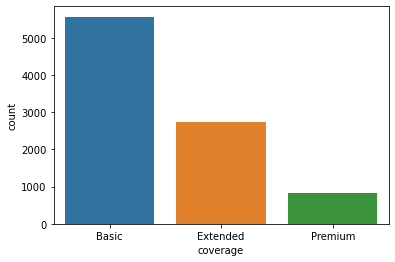

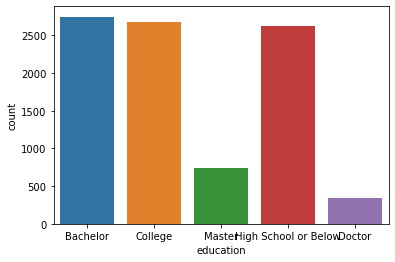

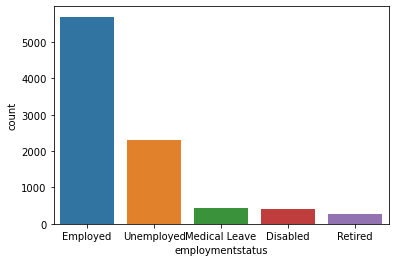

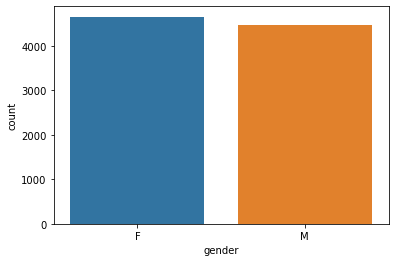

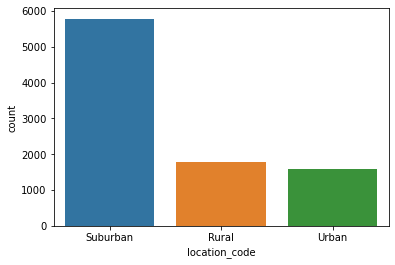

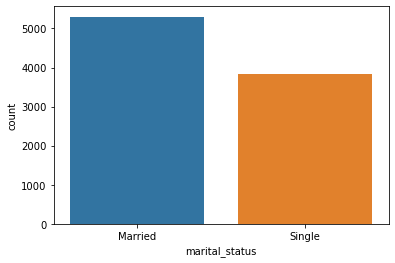

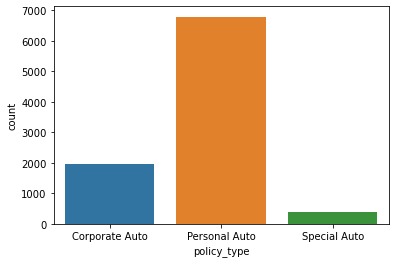

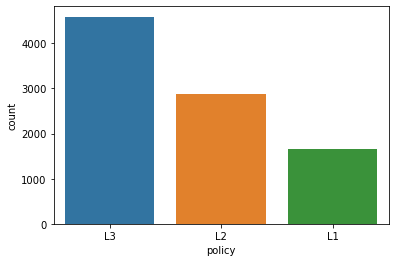

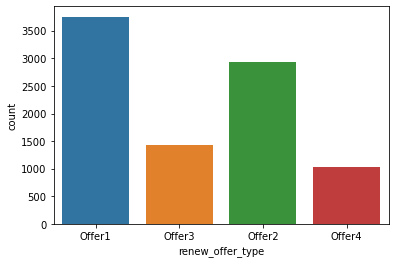

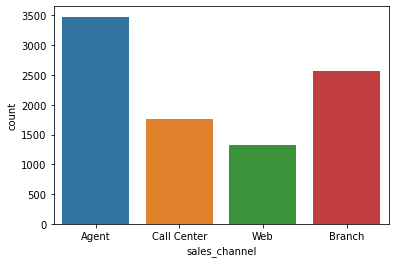

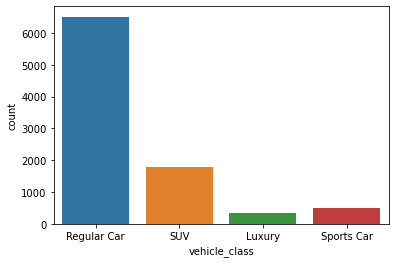

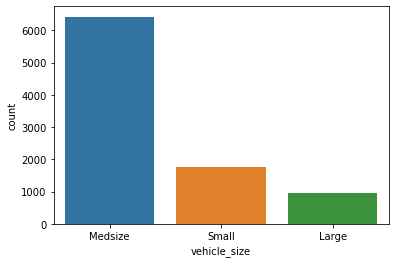

In [50]:
def plot_countplot(df): # for categorical and discrete-numerical columns
    for column in df.columns:
        sns.countplot(x=df[column])
        plt.show()
    return None

plot_countplot(categorical_df)

# Ordinal Encoding

In [51]:
# Note: As we are going to minmax scale the numericala, it is best to
        # either assign the ordinal encoding numbers between 0 and 1
        # or later minmax scale the ordinal encoded columns.

In [52]:
categorical_df["coverage"] = categorical_df["coverage"].map({"Basic" : 0, "Extended" : 0.5, "Premium" : 1})


In [53]:
categorical_df["education"] = categorical_df["education"].map({"High School or Below" : 0, "College" : 0.1, "Bachelor" : 0.3, "Master" : 0.6, "Doctor" : 1})


In [54]:
categorical_df["employmentstatus"] = categorical_df["employmentstatus"].map({"Medical Leave" : 0,"Disabled" : 0, "Unemployed" : 0, "Retired" : 0.25, "Employed" : 1})


In [55]:
categorical_df["location_code"] = categorical_df["location_code"].map({"Rural" : 0, "Suburban" : 0.25, "Urban" : 1})


In [56]:
categorical_df["vehicle_size"] = categorical_df["vehicle_size"].map({"Small" : 0, "Medsize" : 0.5, "Large" : 1})


In [57]:
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,0.0,0.3,1.0,F,0.25,Married,Corporate Auto,L3,Offer1,Agent,Regular Car,0.5
1,Arizona,No,0.5,0.3,0.0,F,0.25,Single,Personal Auto,L3,Offer3,Agent,Regular Car,0.5
2,Nevada,No,1.0,0.3,1.0,F,0.25,Married,Personal Auto,L3,Offer1,Agent,Regular Car,0.5
3,California,No,0.0,0.3,0.0,M,0.25,Married,Corporate Auto,L2,Offer1,Call Center,SUV,0.5
4,Washington,No,0.0,0.3,1.0,M,0.00,Single,Personal Auto,L1,Offer1,Agent,Regular Car,0.5


# Concatenating numerical and categorical

In [58]:
# (ordinal encoding DONE, scaling NOT)

In [59]:
X_all = pd.concat([numerical_df,categorical_df], axis = 1)
X_all.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,2763.519279,56274,69,32,5,0,1,384.811147,Washington,No,0.0,0.3,1.0,F,0.25,Married,Corporate Auto,L3,Offer1,Agent,Regular Car,0.5
1,6979.535903,0,94,13,42,0,8,1131.464935,Arizona,No,0.5,0.3,0.0,F,0.25,Single,Personal Auto,L3,Offer3,Agent,Regular Car,0.5
2,12887.431650,48767,108,18,38,0,2,566.472247,Nevada,No,1.0,0.3,1.0,F,0.25,Married,Personal Auto,L3,Offer1,Agent,Regular Car,0.5
3,7645.861827,0,106,18,65,0,7,529.881344,California,No,0.0,0.3,0.0,M,0.25,Married,Corporate Auto,L2,Offer1,Call Center,SUV,0.5
4,2813.692575,43836,73,12,44,0,1,138.130879,Washington,No,0.0,0.3,1.0,M,0.00,Single,Personal Auto,L1,Offer1,Agent,Regular Car,0.5


# X-y split

In [60]:
X=X_all.drop('total_claim_amount', axis=1)
y=X_all['total_claim_amount']

In [61]:
X.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
state                            0
response                         0
coverage                         0
education                        0
employmentstatus                 0
gender                           0
location_code                    0
marital_status                   0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
vehicle_class                    0
vehicle_size                     0
dtype: int64

# Train-test split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (7307, 21)
X_test shape:  (1827, 21)
y_train shape:  (7307,)
y_test shape:  (1827,)


# Numerical-Categorical

In [63]:
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num  = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat  = X_test.select_dtypes(include = object)

# MinMax scaling

In [64]:
transformer = MinMaxScaler().fit(X_train_num)

In [65]:
#X_train

X_norm1 = transformer.transform(X_train_num)
X_train_scale = pd.DataFrame(X_norm1,columns=X_train_num.columns)
X_train_scale.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,education,employmentstatus,location_code,vehicle_size
0,0.042134,0.810794,0.038136,0.571429,0.040404,0.8,0.250,0.0,0.1,1.0,0.00,1.0
1,0.008654,0.419660,0.021186,0.428571,0.494949,0.2,0.000,0.0,0.6,1.0,1.00,0.0
2,0.036431,0.374131,0.258475,0.657143,0.383838,0.2,0.000,0.5,0.3,1.0,0.25,0.0
3,0.074966,0.000000,0.194915,0.085714,0.656566,0.0,0.250,0.0,0.1,0.0,0.25,0.5
4,0.140581,0.802923,0.216102,0.171429,0.404040,0.2,0.125,0.0,0.3,1.0,0.00,0.5


In [66]:
#X_test

X_norm2 = transformer.transform(X_test_num)
X_test_scale = pd.DataFrame(X_norm2,columns=X_test_num.columns)
X_test_scale.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,education,employmentstatus,location_code,vehicle_size
0,0.006821,0.837879,0.004237,0.371429,0.767677,0.0,0.000,0.0,0.1,1.0,0.00,1.0
1,0.083444,0.977866,0.046610,0.628571,0.141414,0.0,0.125,0.0,0.0,1.0,0.00,0.5
2,0.043305,0.674268,0.029661,0.200000,0.373737,0.0,0.875,0.0,0.3,1.0,0.00,0.5
3,0.023898,0.439954,0.148305,0.828571,0.171717,0.0,0.000,0.5,0.3,1.0,0.25,0.5
4,0.033779,0.000000,0.254237,0.314286,0.101010,0.0,0.000,0.5,0.3,0.0,0.25,0.5


# OneHot Encoding

In [67]:
X_train_cat.head(1)

,state,response,gender,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class
1212,California,No,F,Single,Personal Auto,L3,Offer1,Agent,Regular Car


In [68]:
#X_train

encoder = OneHotEncoder(drop='first').fit(X_train_cat)

cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)

X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)

X_train_cat_encode.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_L2,policy_L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Regular Car,vehicle_class_SUV,vehicle_class_Sports Car
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [69]:
#X_test

cols = encoder.get_feature_names_out(input_features=X_test_cat.columns)

X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)

X_test_cat_encode.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_L2,policy_L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Regular Car,vehicle_class_SUV,vehicle_class_Sports Car
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Concatenating scaled and encoded dfs

In [70]:
X_train = pd.concat([X_train_cat_encode, X_train_scale], axis=1)

X_test = pd.concat([X_test_cat_encode, X_test_scale], axis=1)

In [71]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (7307, 32)
X_test shape:  (1827, 32)
y_train shape:  (7307,)
y_test shape:  (1827,)


# Model

In [72]:
# Define function to run all models.

def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train-->{model.score(X_train, y_train)}, Test-->{model.score(X_test, y_test)}")

In [73]:
model_list = [LinearRegression(), SGDRegressor(), KNeighborsRegressor(), MLPRegressor(), 
              DecisionTreeRegressor(), RandomForestRegressor()]


In [74]:
models_automation(model_list, X_train, y_train)


LinearRegression: Train-->0.5715789528963581, Test-->0.5714197944480193
SGDRegressor: Train-->0.5692929506263695, Test-->0.5671183132950044
KNeighborsRegressor: Train-->0.6095251985303305, Test-->0.44042579668717496


/Users/elifyildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor: Train-->0.6529599909339032, Test-->0.6508339014148772
DecisionTreeRegressor: Train-->1.0, Test-->0.6684579196233442
RandomForestRegressor: Train-->0.9767118108014667, Test-->0.8325473935706053


In [75]:
# Random Forest Regressor has the best score.

# Random variable distributions

In [76]:
#Instructions
#Get the numerical variables from our dataset.
#Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
#Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.


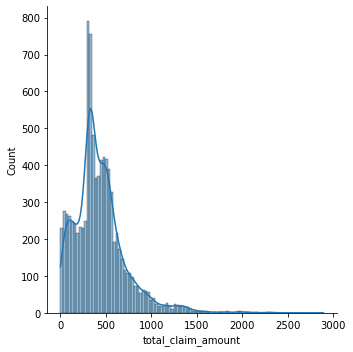

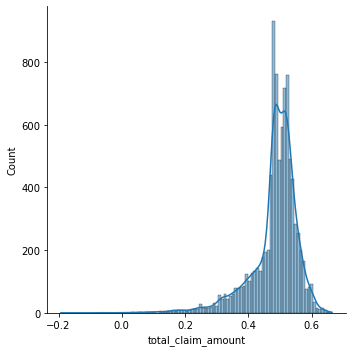

In [77]:
sns.displot(numerical_df['total_claim_amount'], bins=100, kde=True)
sns.displot(numerical_df['total_claim_amount'].apply(np.log)/12, bins=100, kde=True)
plt.show()

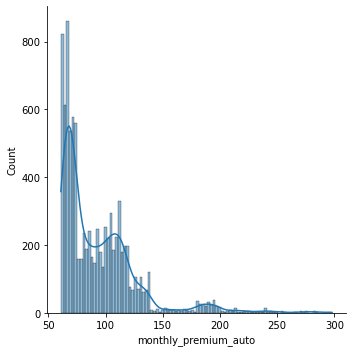

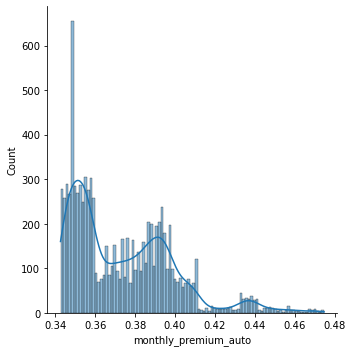

In [78]:
sns.displot(numerical_df['monthly_premium_auto'], bins=100, kde=True)
sns.displot(numerical_df['monthly_premium_auto'].apply(np.log)/12, bins=100, kde=True)
plt.show()

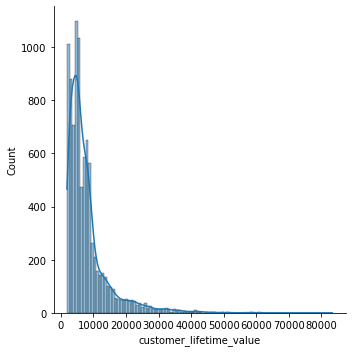

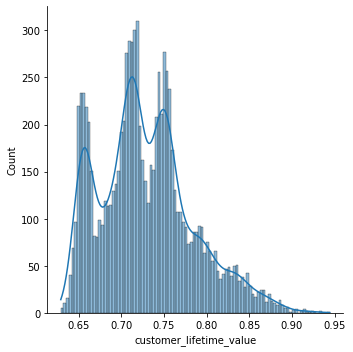

In [79]:
sns.displot(numerical_df['customer_lifetime_value'], bins=100, kde=True)
sns.displot(numerical_df['customer_lifetime_value'].apply(np.log)/12, bins=100, kde=True)
plt.show()

In [ ]:
# monthly_premium_auto is still not really normal.